In [4]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = '../demo_dataset/'
# Pattern match IMU data
imu_files = glob.glob(path + "SERVE_*-[0-9][0-9].csv")
# Pattern match camera data
cam_files = glob.glob(path + "SERVE_*_webcam.csv")

print(len(imu_files))
print(len(cam_files))
print(sorted(imu_files))

20
20
['../demo_dataset/SERVE_15_03_2023_17-31-49.csv', '../demo_dataset/SERVE_15_03_2023_17-32-08.csv', '../demo_dataset/SERVE_15_03_2023_17-32-25.csv', '../demo_dataset/SERVE_15_03_2023_17-32-39.csv', '../demo_dataset/SERVE_15_03_2023_17-33-00.csv', '../demo_dataset/SERVE_15_03_2023_17-33-13.csv', '../demo_dataset/SERVE_15_03_2023_17-33-43.csv', '../demo_dataset/SERVE_15_03_2023_17-34-06.csv', '../demo_dataset/SERVE_15_03_2023_17-34-57.csv', '../demo_dataset/SERVE_15_03_2023_17-35-21.csv', '../demo_dataset/SERVE_15_03_2023_17-36-18.csv', '../demo_dataset/SERVE_15_03_2023_17-36-40.csv', '../demo_dataset/SERVE_15_03_2023_17-36-54.csv', '../demo_dataset/SERVE_15_03_2023_17-37-19.csv', '../demo_dataset/SERVE_15_03_2023_17-37-47.csv', '../demo_dataset/SERVE_15_03_2023_17-38-01.csv', '../demo_dataset/SERVE_15_03_2023_17-38-17.csv', '../demo_dataset/SERVE_15_03_2023_17-39-12.csv', '../demo_dataset/SERVE_15_03_2023_17-39-26.csv', '../demo_dataset/SERVE_15_03_2023_17-39-48.csv']


In [19]:
labels = ['IMU','index','Xacc', 'Yacc', 'Zacc', 'Xori', 'Yori', 'Zori', 'Xmag', 'Ymag' , 'Zmag', 'Xgyro', 'Ygyro', 'Zgyro', 'Xrot','Yrot', 'Zrot' , 'Xlin' ,'Ylin', 'Zlin', 'Xgrav', 'Ygrav', 'Zgrav']

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_imu = [pd.read_csv(file,skiprows=4,header=None,names=labels) for file in imu_files]

df_cam = [pd.read_csv(file,names=['index','x','y']) for file in cam_files]

# Concatenate all DataFrames
df_full = []
for i in range(len(df_imu)):
    df_full.append(pd.merge(df_imu[i], df_cam[i], on='index'))

In [20]:
df_full[0].head()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,72,-63,0,0,64,27,-1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-8,-3,17,-74,-47,12,28,-7,...,0,0,-1,-1,11,-6,-2,6,0,0
2,1,1,84,-55,-105,39,24,0,0,0,...,-6,-4,-8,-3,-3,0,0,0,-1,0
3,2,1,-8,-3,17,-74,-47,12,28,-7,...,0,0,-1,-1,11,-6,-2,6,-1,0
4,1,2,84,-55,-105,39,24,0,0,0,...,-6,-4,-8,-3,-3,0,0,0,-1,0


In [21]:
df = df_full[0]

In [22]:
df.head()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,72,-63,0,0,64,27,-1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-8,-3,17,-74,-47,12,28,-7,...,0,0,-1,-1,11,-6,-2,6,0,0
2,1,1,84,-55,-105,39,24,0,0,0,...,-6,-4,-8,-3,-3,0,0,0,-1,0
3,2,1,-8,-3,17,-74,-47,12,28,-7,...,0,0,-1,-1,11,-6,-2,6,-1,0
4,1,2,84,-55,-105,39,24,0,0,0,...,-6,-4,-8,-3,-3,0,0,0,-1,0


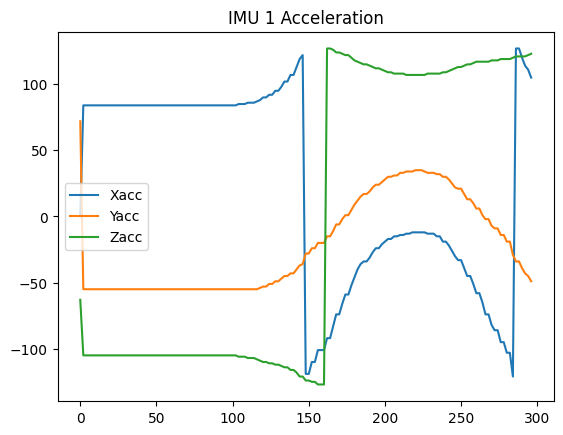

In [26]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'], label='Xacc')
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'], label='Yacc')
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'], label='Zacc')
plt.title(f'IMU {IMU} Acceleration')
plt.legend()
plt.show()

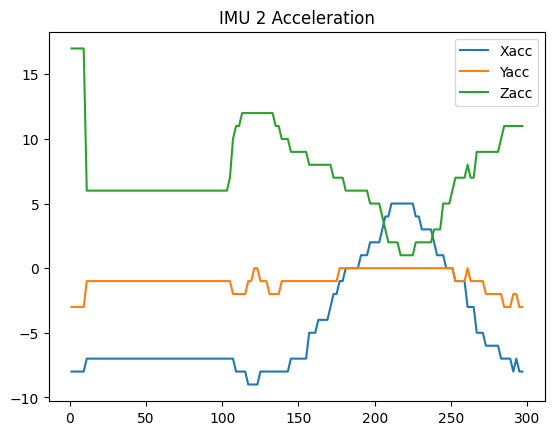

In [27]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'], label='Xacc')
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'], label='Yacc')
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'], label='Zacc')
plt.title(f'IMU {IMU} Acceleration')
plt.legend()
plt.show()

In [25]:
df.drop_duplicates()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav,x,y
0,1,0,0,72,-63,0,0,64,27,-1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,-8,-3,17,-74,-47,12,28,-7,...,0,0,-1,-1,11,-6,-2,6,0,0
2,1,1,84,-55,-105,39,24,0,0,0,...,-6,-4,-8,-3,-3,0,0,0,-1,0
3,2,1,-8,-3,17,-74,-47,12,28,-7,...,0,0,-1,-1,11,-6,-2,6,-1,0
4,1,2,84,-55,-105,39,24,0,0,0,...,-6,-4,-8,-3,-3,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2,146,-7,-2,11,-79,-28,14,12,-11,...,0,0,-3,0,2,-4,-2,8,-1,2
294,1,147,111,-45,122,21,41,1,0,-1,...,0,-2,-6,-6,-3,0,0,0,-1,2
295,2,147,-8,-3,11,-79,-31,15,12,-11,...,0,0,-3,0,3,-4,-2,8,-1,2
296,1,148,105,-49,123,21,41,1,0,-1,...,-2,-2,-7,-5,-3,0,0,0,-1,2
